In [307]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

In [308]:
def show_images(images, cmap=None):
    cols = 2
    rows = (len(images)+1)//cols
    
    plt.figure(figsize=(25, 20))
    for i, image in enumerate(images):
        plt.subplot(rows, cols, i+1)
        # use gray scale color map if there is only one channel
        cmap = 'gray' if len(image.shape)==2 else cmap
        plt.imshow(image, cmap=cmap)
        plt.xticks([])
        plt.yticks([])
    plt.tight_layout(pad=0, h_pad=0, w_pad=0)
    plt.show()

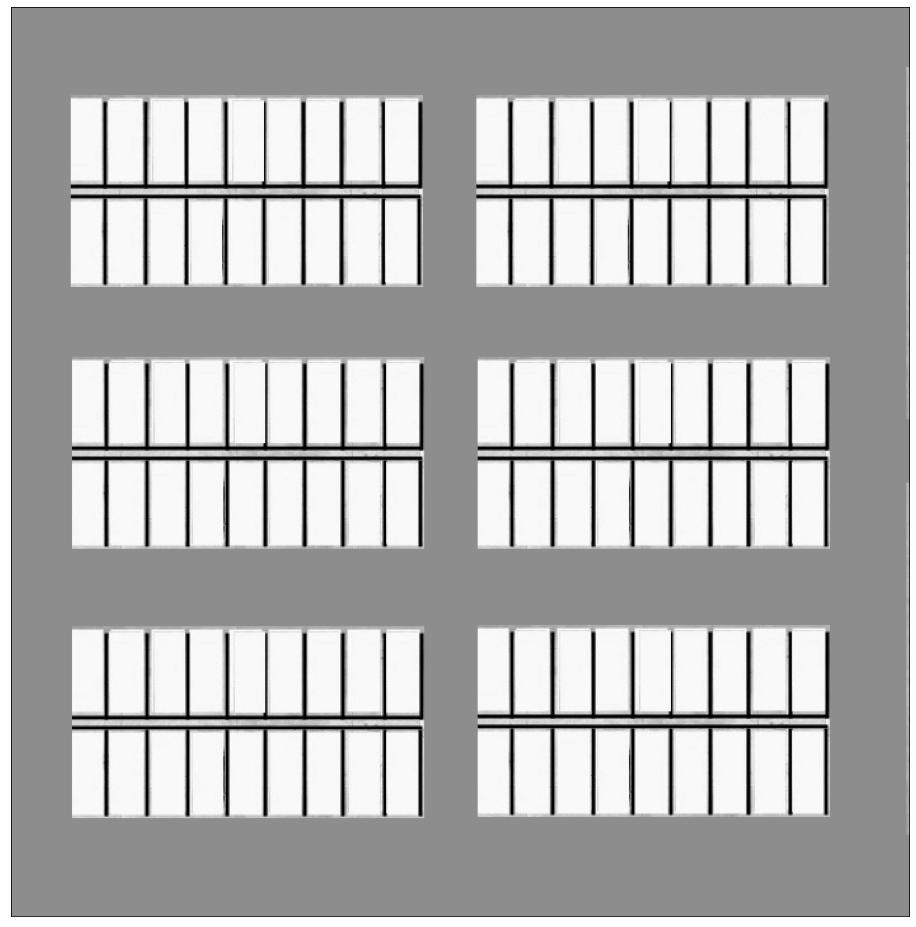

In [309]:
img=cv2.imread("input.png",0)
show_images([img])

In [263]:
img.shape

(716, 925)

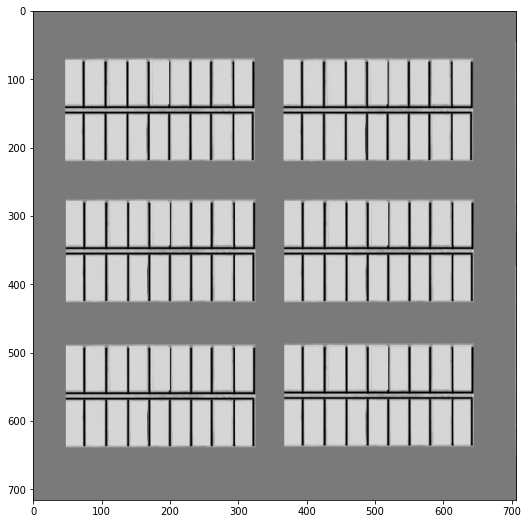

In [310]:
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

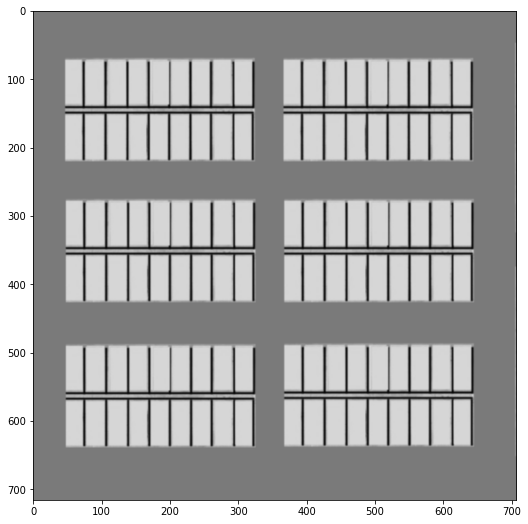

In [311]:
blurImg = cv2.GaussianBlur(img, (3,3), 0)
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(blurImg,cv2.COLOR_BGR2RGB))
plt.show()

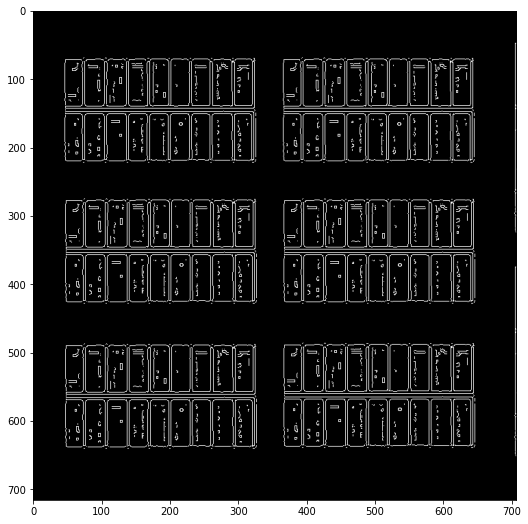

In [312]:
edged = cv2.Canny(blurImg,50,150,apertureSize=7)
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))
plt.show()

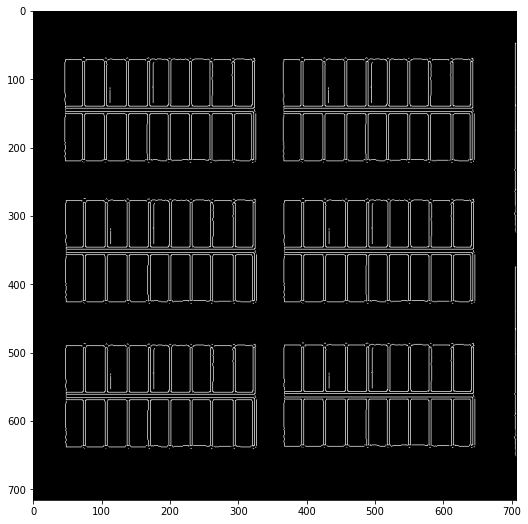

In [313]:
edged = cv2.Canny(blurImg,50,150,apertureSize=5)
plt.figure(figsize=(9,9))
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))
plt.show()

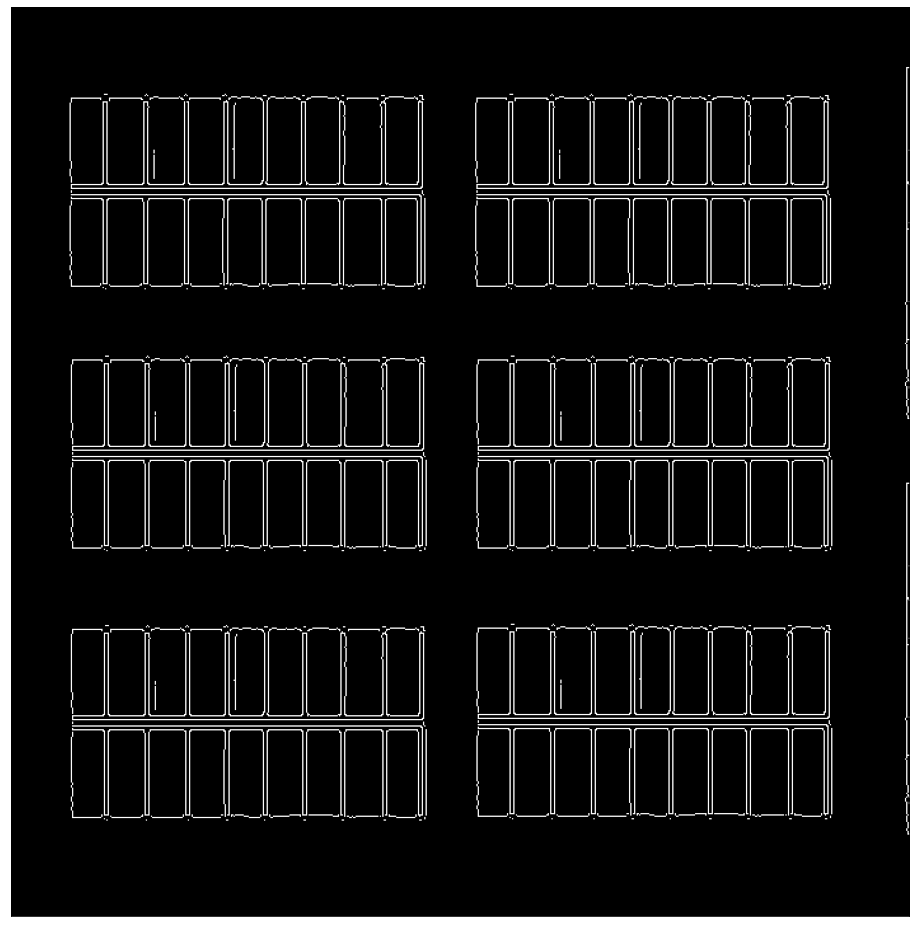

In [314]:
edged = cv2.Canny(blurImg,50,150,apertureSize=5)
show_images([edged])

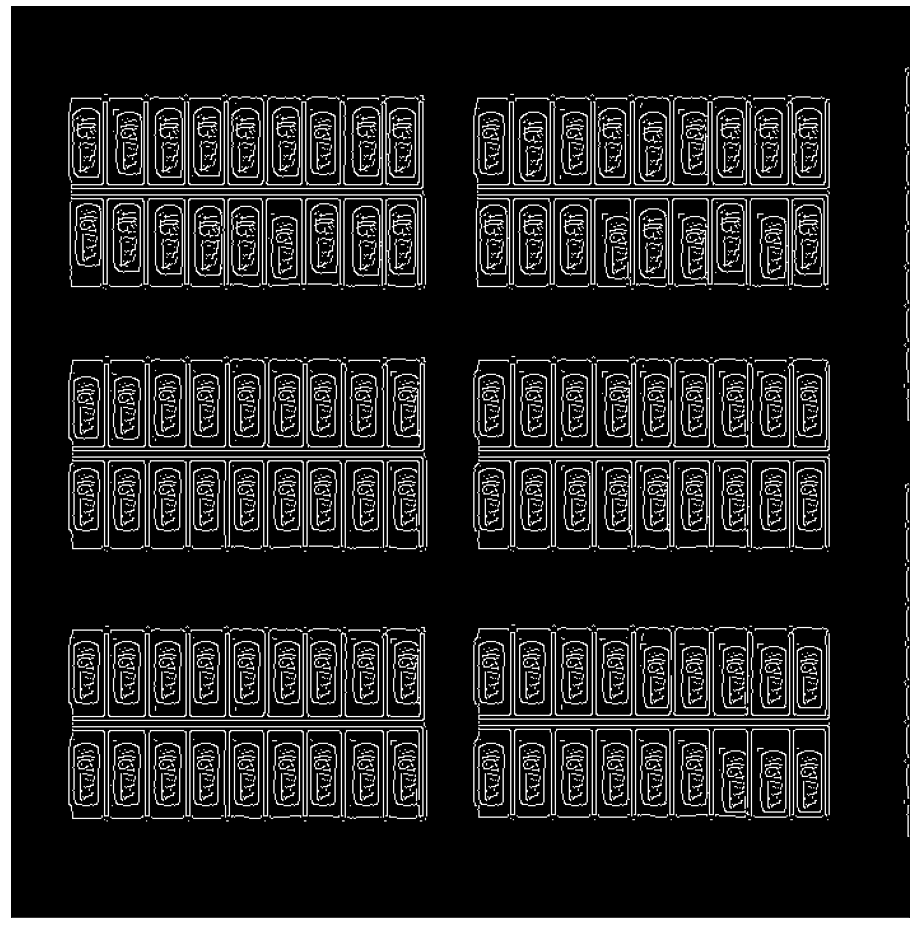

In [329]:
parkImg=cv2.imread("parking-lot4.png",0)
parkblurImg = cv2.GaussianBlur(parkImg, (3,3), 0)
parkedged = cv2.Canny(parkblurImg,50,150,apertureSize=5)

show_images([parkedged])

In [336]:
parkImg=cv2.imread("parking-lot4.png",0)


In [339]:
parkImg[:,:707].shape

(716, 708)

In [328]:
edged.shape

(716, 707)

In [330]:



# find the absolute difference between background and current frame
diff = cv2.absdiff(parkedged[:,:-1], edged)

# threshold the diff image so that we get the foreground
thresholded = cv2.threshold(diff, threshold, 255, cv2.THRESH_BINARY)[1]

# get the contours in the thresholded image
(_, cnts) = cv2.findContours(thresholded.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

show_images([diff])



error: OpenCV(4.5.4) /tmp/pip-req-build-24v3eisa/opencv/modules/core/src/arithm.cpp:647: error: (-209:Sizes of input arguments do not match) The operation is neither 'array op array' (where arrays have the same size and the same number of channels), nor 'array op scalar', nor 'scalar op array' in function 'arithm_op'


In [283]:
np.sum(diff)

3249210